In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Step 1: Create the DataFrame
data = {
    "Weather": ['Sunny', 'Rainy', 'Overcast', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Rainy', 'Sunny', 'Rainy'],
    "TimeOfDay": ['Morning', 'Morning', 'Afternoon', 'Afternoon', 'Evening', 'Morning', 'Morning', 'Afternoon', 'Evening', 'Morning'],
    "SleepQuality": ['Poor', 'Good', 'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Good', 'Good', 'Poor'],
    "Mood": ['Tired', 'Fresh', 'Tired', 'Energetic', 'Tired', 'Fresh', 'Tired', 'Tired', 'Energetic', 'Tired'],
    "BuyCoffee": ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Weather,TimeOfDay,SleepQuality,Mood,BuyCoffee
0,Sunny,Morning,Poor,Tired,Yes
1,Rainy,Morning,Good,Fresh,No
2,Overcast,Afternoon,Poor,Tired,Yes
3,Sunny,Afternoon,Good,Energetic,No
4,Rainy,Evening,Poor,Tired,Yes
5,Sunny,Morning,Good,Fresh,No
6,Overcast,Morning,Poor,Tired,Yes
7,Rainy,Afternoon,Good,Tired,Yes
8,Sunny,Evening,Good,Energetic,No
9,Rainy,Morning,Poor,Tired,Yes


In [5]:
# Encode each column with separate LabelEncoders
encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le  # Save encoder for each column


In [6]:
# Separate features and target
X = df.drop('BuyCoffee', axis=1)
y = df['BuyCoffee']

In [7]:
# Step 3: Train Decision Tree Classifier (ID3 = entropy)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


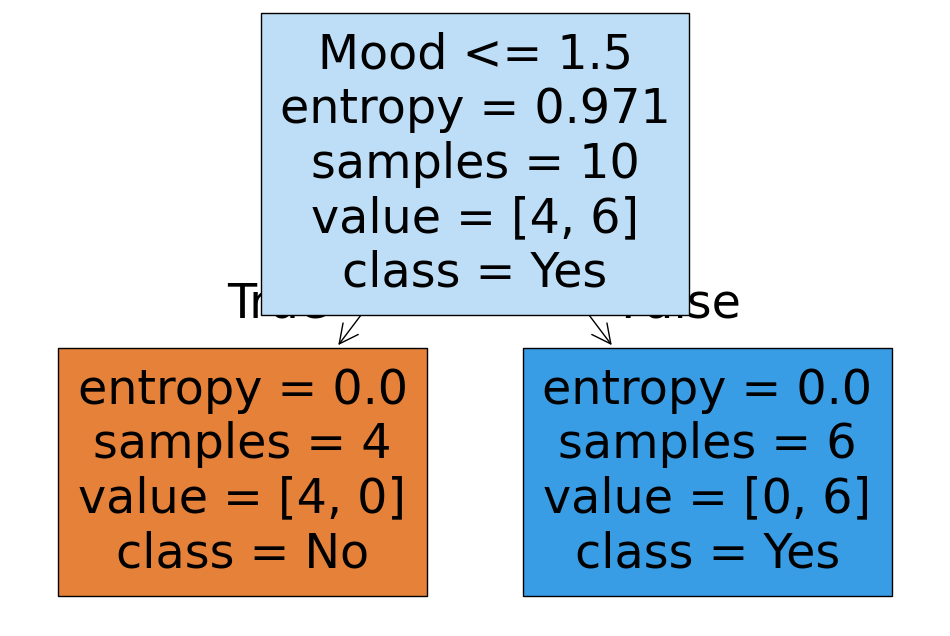

In [8]:
# Step 4: Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [9]:
# ✅ Predict for: Weather=Rainy, TimeOfDay=Morning, SleepQuality=Poor, Mood=Tired
input_data = pd.DataFrame([['Rainy', 'Morning', 'Poor', 'Tired']], columns=X.columns)

In [10]:
# Encode using the previously fitted encoders
for col in input_data.columns:
    input_data[col] = encoders[col].transform(input_data[col])

In [12]:
# Predict
prediction = clf.predict(input_data)
result = encoders['BuyCoffee'].inverse_transform(prediction)[0]
print("Buy Coffee:", result)


Buy Coffee: Yes
